In [1]:
import pandas as  pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data_U=pd.read_csv('u.data' ,sep='\t' , names=['user_id','item_id','rating','timestamp'])
data_U.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
data_user=pd.read_csv('u.user',sep='|',names=['user_id','age','gender','occupation','Zip_Code'])
data_user.head()


,user_id,age,gender,occupation,Zip_Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
data_item=pd.read_csv('u.item',sep='|',names=['movie_id','movie_title','release date','video_release_date', 
                                              'IMDb_URL','unknown','Action','Adventure','Animation', 'Childrens','Comedy',
                                              'Crime', 'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
                                             'Romance','Sci-Fi','Thriller','War','Western']) 

data_item['item_id']=data_item['movie_id']
data_item.head()


,movie_id,movie_title,release date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,item_id
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,2
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5


In [5]:
data_u_item=pd.merge(data_U, data_item, on='item_id') 
data_u_item.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'movie_id', 'movie_title',
       'release date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [6]:
data_main=pd.merge(data_u_item,data_user)

In [7]:
data_main.shape

(100000, 32)

In [9]:
df=data_main.groupby('movie_title').sum()
dh=df.sort_values(by='rating') 
dg=dh.head(100)
print(dg)

data_main.hist(column='age', bins=20)

                                             user_id  item_id  rating  \
movie_title                                                             
Daens (1992)                                     405     1565       1   
Lotto Land (1995)                                181     1343       1   
Bird of Prey (1996)                              181     1364       1   
Liebelei (1933)                                  405     1580       1   
Leopard Son, The (1996)                          181     1363       1   
...                                              ...      ...     ...   
Land and Freedom (Tierra y libertad) (1995)      655     1632       3   
Crows and Sparrows (1949)                        388     2700       3   
Fire on the Mountain (1996)                        7      677       3   
Big One, The (1997)                              655     1649       3   
Fear, The (1995)                                 314     1520       3   

                                              time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C9C8E9BC8>]],
      dtype=object)

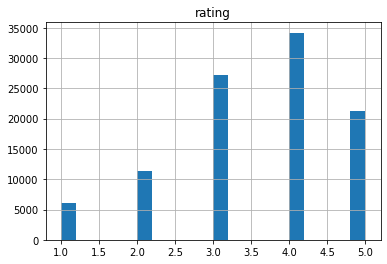

In [20]:
data_main.hist(column='rating', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C9B5BC348>]],
      dtype=object)

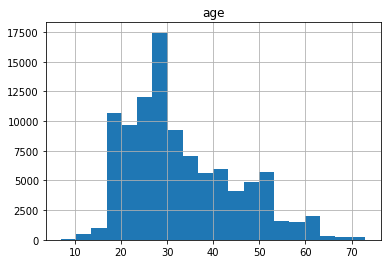

In [10]:
data_main.hist(column='age', bins=20)

In [12]:
from sklearn import preprocessing

In [14]:
X = data_main[['movie_id','age','unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']] .values  #.astype(float)
X[0:10]




array([[242,  49,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0],
       [257,  49,   0,   1,   1,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0],
       [111,  49,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0],
       [ 25,  49,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0],
       [382,  49,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0],
       [202,  49,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   0],
       [153,  49,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0],
       [286,  49,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   1,   0,   0,   1,   0],
       [ 66,  49,   0,  

In [29]:
data_main['label'] =[1  if i >3.5 else 0 for i in data_main.rating]

data_main.head()

,user_id,item_id,rating,timestamp,movie_id,movie_title,release date,video_release_date,IMDb_URL,unknown,...,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,Zip_Code,label
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,...,0,0,0,0,0,49,M,writer,55105,0
1,196,257,2,881251577,257,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,...,0,1,0,0,0,49,M,writer,55105,0
2,196,111,4,881251793,111,"Truth About Cats & Dogs, The (1996)",26-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Truth%20About...,0,...,1,0,0,0,0,49,M,writer,55105,1
3,196,25,4,881251955,25,"Birdcage, The (1996)",08-Mar-1996,NaN,"http://us.imdb.com/M/title-exact?Birdcage,%20T...",0,...,0,0,0,0,0,49,M,writer,55105,1
4,196,382,4,881251843,382,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Adventures%20...,0,...,0,0,0,0,0,49,M,writer,55105,1


In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float)) #Z-skor normalizasyonu
X[0:5]

array([[-0.55481245,  1.3863835 , -0.0100005 , -0.58641907, -0.3993252 ,
        -0.19338616, -0.27816763,  1.53365743, -0.29598433, -0.08739505,
        -0.81471166, -0.11706962, -0.13279919, -0.23697216, -0.22830272,
        -0.23527278, -0.49156331, -0.38192819, -0.52910382, -0.32206893,
        -0.13744171],
       [-0.50946738,  1.3863835 , -0.0100005 ,  1.70526514,  2.5042246 ,
        -0.19338616, -0.27816763,  1.53365743, -0.29598433, -0.08739505,
        -0.81471166, -0.11706962, -0.13279919, -0.23697216, -0.22830272,
        -0.23527278, -0.49156331,  2.61829325, -0.52910382, -0.32206893,
        -0.13744171],
       [-0.95082607,  1.3863835 , -0.0100005 , -0.58641907, -0.3993252 ,
        -0.19338616, -0.27816763,  1.53365743, -0.29598433, -0.08739505,
        -0.81471166, -0.11706962, -0.13279919, -0.23697216, -0.22830272,
        -0.23527278,  2.03432596, -0.38192819, -0.52910382, -0.32206893,
        -0.13744171],
       [-1.21080448,  1.3863835 , -0.0100005 , -0.58641907

In [30]:
y = data_main['label'].values
y[0:10]

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (80000, 21) (80000,)
Test set: (20000, 21) (20000,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [35]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

print("Train set Confusion Matrice:\n", metrics.confusion_matrix(y_train, neigh.predict(X_train)))
print("Test set Confusion Matrice:\n", metrics.confusion_matrix(y_test, yhat))

Train set Accuracy:  0.745275
Test set Accuracy:  0.5835
Train set Confusion Matrice:
 [[25611 10114]
 [10264 34011]]
Test set Confusion Matrice:
 [[4770 4130]
 [4200 6900]]
